In [2]:
from google.colab import files
uploaded = files.upload()


Saving cars_dataset_cleaned (1)22.csv to cars_dataset_cleaned (1)22.csv


In [3]:
import pandas as pd

# Load the file into a DataFrame
df = pd.read_csv('cars_dataset_cleaned (1)22.csv')

# Check if the data loaded correctly
df.head()



,model,year,transmission,mileage,fuelType,mpg,engineSize,Manufacturer
0,A1,2017,Manual,15735,Petrol,55.4,1.4,audi
1,A6,2016,Automatic,36203,Diesel,64.2,2.0,audi
2,A1,2016,Manual,29946,Petrol,55.4,1.4,audi
3,A4,2017,Automatic,25952,Diesel,67.3,2.0,audi
4,A3,2019,Manual,1998,Petrol,49.6,1.0,audi


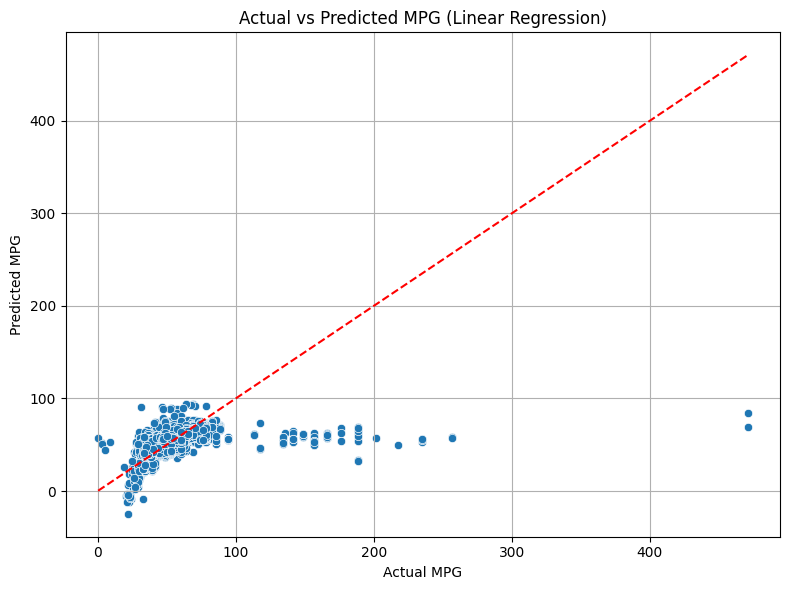

Mean Squared Error (MSE): 156.49644659417442
R² Score: 0.2869367683715929


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy of the data
data = df.copy()

# Encode categorical columns
categorical_cols = ['model', 'transmission', 'fuelType', 'Manufacturer']
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    le_dict[col] = le

# Define inputs (X) and target (y)
X = data.drop(columns=['mpg'])
y = data['mpg']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate error and accuracy metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the results
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)



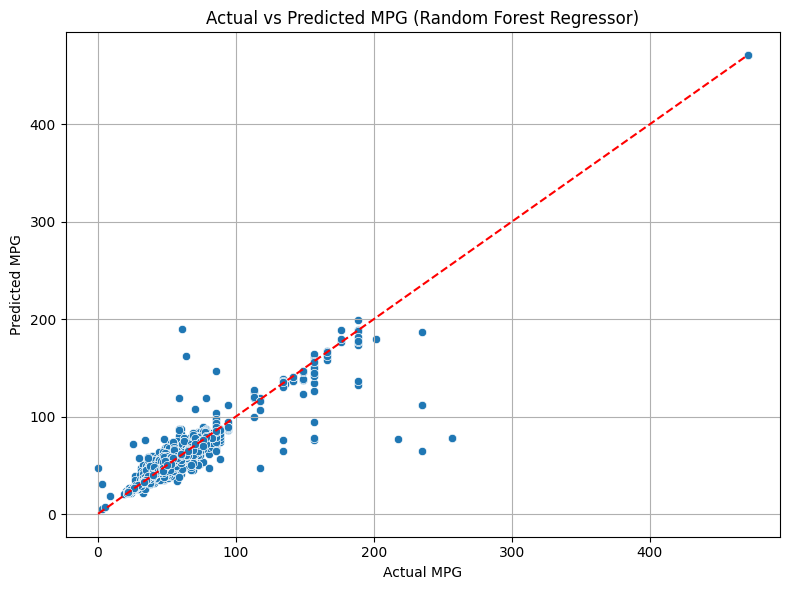

(27.444033063556958, 0.8749535128042629)

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_rf_pred = rf_model.predict(X_test)

# Evaluate
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

# Plot actual vs predicted for Random Forest
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG (Random Forest Regressor)")
plt.grid(True)
plt.tight_layout()
plt.show()

rf_mse, rf_r2


In [6]:
!pip install xgboost


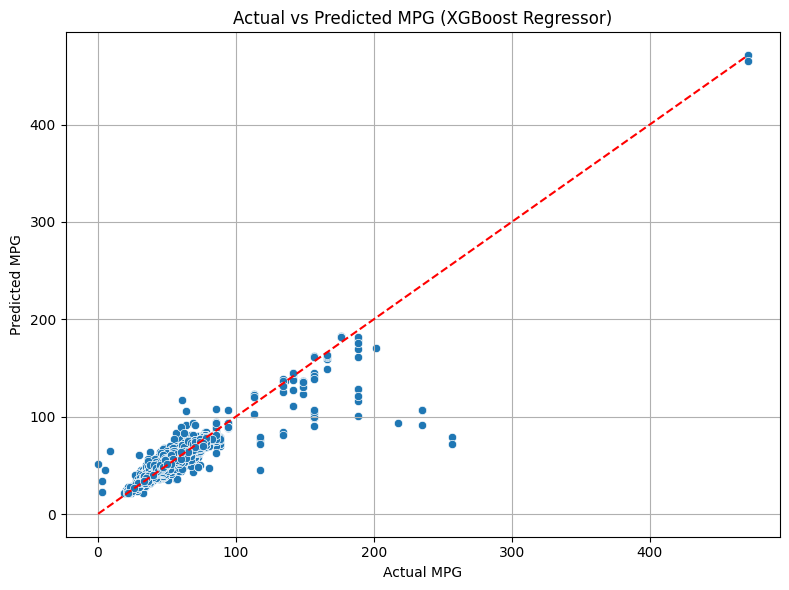

Mean Squared Error (MSE): 30.20554017277465
R² Score: 0.8623709320088668


In [7]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict values using the trained model
y_xgb_pred = xgb_model.predict(X_test)

# Evaluate the model's performance
xgb_mse = mean_squared_error(y_test, y_xgb_pred)
xgb_r2 = r2_score(y_test, y_xgb_pred)

# Plot Actual vs Predicted MPG
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_xgb_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG (XGBoost Regressor)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print evaluation metrics
print("Mean Squared Error (MSE):", xgb_mse)
print("R² Score:", xgb_r2)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 999.8862 - val_loss: 218.2113
Epoch 2/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 198.6955 - val_loss: 192.2366
Epoch 3/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 164.5869 - val_loss: 159.4290
Epoch 4/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 140.1000 - val_loss: 131.7677
Epoch 5/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 131.6082 - val_loss: 105.9525
Epoch 6/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 86.8607 - val_loss: 93.6799
Epoch 7/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 80.5523 - val_loss: 79.9051
Epoch 8/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 70.9455 - val_loss: 75.1189
Epoch 9/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 62.4469 - val_loss: 70.5390
Epoch 10/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 61.1818 - val_loss: 67.9262
Epoch 11/100
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 56.6971 - val

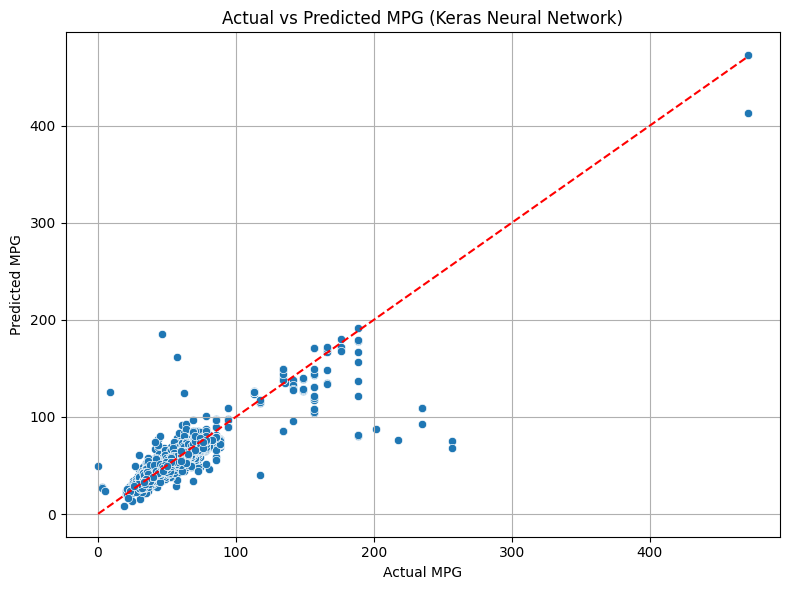

Mean Squared Error: 41.1714
R² Score: 0.8124


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scale features (important for NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(50, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Predict
y_pred = model.predict(X_test_scaled).flatten()

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG (Keras Neural Network)")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


In [9]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.0 MB/s eta 0:00:00


In [10]:
import gradio as gr

#
def predict_mpg(model, year, transmission, mileage, fuelType, engineSize, Manufacturer):
    input_dict = {
        'model': le_dict['model'].transform([model])[0],
        'year': int(year),
        'transmission': le_dict['transmission'].transform([transmission])[0],
        'mileage': float(mileage),
        'fuelType': le_dict['fuelType'].transform([fuelType])[0],
        'engineSize': float(engineSize),
        'Manufacturer': le_dict['Manufacturer'].transform([Manufacturer])[0],
    }
    input_df = pd.DataFrame([input_dict])
    prediction = xgb_model.predict(input_df)[0]
    return f"Estimated Fuel Efficiency (mpg): {prediction:.2f}"

#
models = list(le_dict['model'].classes_)
transmissions = list(le_dict['transmission'].classes_)
fuel_types = list(le_dict['fuelType'].classes_)
manufacturers = list(le_dict['Manufacturer'].classes_)


gr.Interface(
    fn=predict_mpg,
    inputs=[
        gr.Dropdown(models, label="Car Model"),
        gr.Number(label="Year"),
        gr.Dropdown(transmissions, label="Transmission"),
        gr.Number(label="Mileage (km)"),
        gr.Dropdown(fuel_types, label="Fuel Type"),
        gr.Number(label="Engine Size (L)"),
        gr.Dropdown(manufacturers, label="Manufacturer"),
    ],
    outputs="text",
    title="🚗 Fuel Efficiency Predictor (mpg)",
    description="Enter your car's specifications and see its fuel efficiency prediction."
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://858963257c83b4e077.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
